In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import umap.umap_ as umap
import ast

## Genre Level Embeddings 

In [4]:
metadata = pd.read_csv('clean_movie_credits_tmdb.csv', index_col='idx')
pca = pd.read_csv('movie_pca_features.csv', index_col='idx')

In [39]:
genres2embeddings_df = {}
for index, row in metadata.iterrows():
    movie_genres = ast.literal_eval(row['genres'])
    vec = pca.loc[index].values.flatten().tolist()
    for genre in movie_genres:
        if genre not in genres2embeddings_df.keys():
            genres2embeddings_df[genre] = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', \
                                                                'f5', 'f6', 'f7', 'f8'])
            genres2embeddings_df[genre].index.name = 'idx'
        genres2embeddings_df[genre].loc[index] = vec

In [111]:
print(sorted(genres2embeddings_df.keys()))
print(len(genres2embeddings_df))

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
20


In [54]:
genres2umap_df = {}
for genre in genres2embeddings_df.keys():
    embeddings = genres2embeddings_df[genre]
    reducer = umap.UMAP()
    umap_out = reducer.fit_transform(embeddings)
    umap_df = pd.DataFrame(umap_out, columns = ['x', 'y'], index = embeddings.index)
    genres2umap_df[genre] = umap_df
    #plt.scatter(umap_df[:, 0], umap_df[:, 1])

/Users/nealbayya/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


## Genre Level Clusters

In [59]:
from sklearn.cluster import KMeans
import seaborn as sns

In [102]:
pca_df = genres2embeddings_df['Action']
print(pca_df.shape)
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(pca_df)
print(kmeans.labels_.shape)
cluster_df = pd.DataFrame(kmeans.labels_, columns = ['cluster'], index = pca_df.index)
cluster_df

(1154, 8)
(1154,)


,cluster
idx,
0,1
1,1
2,1
3,1
4,2
...,...
4734,0
4769,0
4772,0


In [89]:
within_cluster_sum_of_squares = []
k_values = []
for number_of_clusters in range(1, 20):
    k_values.append(number_of_clusters)
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(pca_df)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

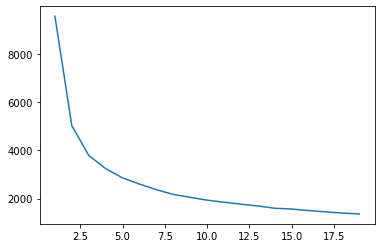

In [90]:
plt.plot(k_values, within_cluster_sum_of_squares)

In [91]:
'''
genre2num_clusters = {}
genre2num_clusters['Action'] = 3
genre2num_clusters['Adventure'] = 4
genre2num_clusters['Fantasy'] = 3
genre2num_clusters['Science Fiction'] = 3
genre2num_clusters['Crime'] = 3
genre2num_clusters['Drama'] = 3
genre2num_clusters['Thriller'] = 3
genre2num_clusters['Animation'] = 3
genre2num_clusters['Family'] = 3
genre2num_clusters['Western'] = 3
genre2num_clusters['Comedy'] = 3
genre2num_clusters['Romance'] = 3
genre2num_clusters['Horror'] = 3
genre2num_clusters['Mystery'] = 3
genre2num_clusters['History'] = 3
genre2num_clusters['War'] = 3
genre2num_clusters['Music'] = 3
genre2num_clusters['Documentary'] = 3
genre2num_clusters['Foreign'] = 3
genre2num_clusters['TV Movie'] = 3
'''

"\ngenre2num_clusters = {}\ngenre2num_clusters['Action'] = 3\ngenre2num_clusters['Adventure'] = 4\ngenre2num_clusters['Fantasy'] = 3\ngenre2num_clusters['Science Fiction'] = 3\ngenre2num_clusters['Crime'] = 3\ngenre2num_clusters['Drama'] = 3\ngenre2num_clusters['Thriller'] = 3\ngenre2num_clusters['Animation'] = 3\ngenre2num_clusters['Family'] = 3\ngenre2num_clusters['Western'] = 3\ngenre2num_clusters['Comedy'] = 3\ngenre2num_clusters['Romance'] = 3\ngenre2num_clusters['Horror'] = 3\ngenre2num_clusters['Mystery'] = 3\ngenre2num_clusters['History'] = 3\ngenre2num_clusters['War'] = 3\ngenre2num_clusters['Music'] = 3\ngenre2num_clusters['Documentary'] = 3\ngenre2num_clusters['Foreign'] = 3\ngenre2num_clusters['TV Movie'] = 3\n"

In [104]:
genre2cluster_df = {}
for genre in genres2embeddings_df.keys():
    pca_df = genres2embeddings_df[genre]
    embeddings_df = genres2embeddings_df[genre]
    kmeans = KMeans(n_clusters = 4, random_state = 42)
    kmeans.fit(embeddings_df)
    cluster_df = pd.DataFrame(kmeans.labels_, columns = ['cluster'], index = pca_df.index)
    genre2cluster_df[genre] = cluster_df

## Output

In [58]:
for genre in genres2umap_df:
    umap_df = genres2umap_df[genre]
    csv_name = genre.replace(" ", "").lower() + '_umap.csv'
    umap_df.to_csv('embeddings/' + csv_name)  

In [110]:
for genre in genre2cluster_df.keys():
    cluster_df = genre2cluster_df[genre]
    csv_name = genre.replace(" ", "").lower() + '_clusters.csv'
    cluster_df.to_csv('clusters/' + csv_name)  